# Transforming Variables

We often transform and combine existing variables to obtain new variables. We'll see how to do this in Pandas, where "vectorization" greatly simplifies this process.

Our examples concern a data set consisting of residential properties in Ames, Iowa from 2006 to 2010. For more information about the variables in this data set, please refer to the [data documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt). (Note: some of the data sets we will encounter, like this one, have become pretty famous examples in data science.)

The data set is stored in a tab-separated values file, rather than a CSV. We can still use `read_csv`, but we need to specify the delimiter (tab rather than comma) with `sep=\t`.

In [1]:
import pandas as pd

In [2]:
df_ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")
df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Transforming Quantitative Variables

One reason to transform a quantitative variable is to change the measurement units. Suppose we want the lot areas to be in acres instead of square feet. Since there are 43560 square feet in an acre, this requires dividing each lot area by 43560. We can **broadcast** the division over the entire `Series`.

In [3]:
df_ames["Lot Area"] / 43560

0       0.729339
1       0.266804
2       0.327525
3       0.256198
4       0.317493
          ...   
2925    0.182208
2926    0.203972
2927    0.239692
2928    0.229798
2929    0.221006
Name: Lot Area, Length: 2930, dtype: float64

If we want to store the results as a new variable in the `DataFrame`, we simply assign the `Series` to a new column in the `DataFrame`. The command below does two things: creates a new column in the `DataFrame` called "Lot Area (acres)" _and_ populates it with the values from the `Series` above.

In [5]:
df_ames["Lot Area (acres)"] = df_ames["Lot Area"] / 43560

Another reason for transforming quantitative variables is to make them more amenable to analysis. To see why a variable might not be amenable to analysis, let's take a look at a histogram of lot areas.

<Axes: ylabel='Frequency'>

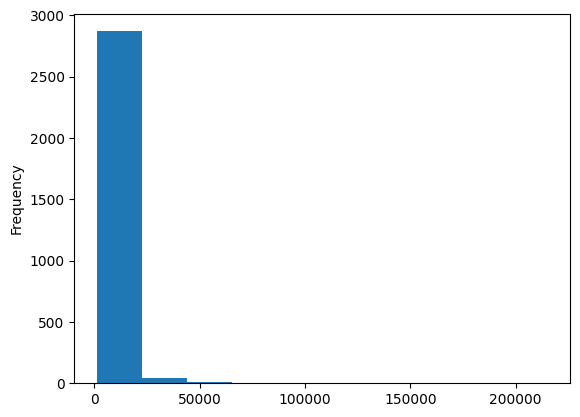

In [6]:
df_ames["Lot Area"].plot.hist()

There are a few homes with such extreme lot areas that we get virtually no resolution at the lower end of the distribution. Over 95% of the observations are in a single bin of this histogram. In other words, this variable is extremely _skewed_.

One way to improve this histogram is to use more bins. But this does not solve the fundamental problem: we need more resolution at the lower end of the scale and less resolution at the higher end. One way to spread out the values at the lower end of a distribution and to compress the values at the higher end is to take the logarithm (provided that the values are all positive). Log transformations are particularly effective at dealing with data that is skewed to the right.

The log function is not built into Python or `pandas`. We have to import the log function from a library called `numpy`, which contains many functions and data structures for numerical computations. In fact, `pandas` is built on top of `numpy`. When we apply `numpy`'s `log` function to a `pandas` `Series`, the function is automatically broadcast over the elements of the `Series`, returning another `Series`. Let's save the results to a variable called "log(Lot Area)".

In [7]:
import numpy as np

In [8]:
df_ames["log(Lot Area)"] = np.log(df_ames["Lot Area"])
df_ames["log(Lot Area)"]

0       10.366278
1        9.360655
2        9.565704
3        9.320091
4        9.534595
          ...    
2925     8.979291
2926     9.092120
2927     9.253496
2928     9.211340
2929     9.172327
Name: log(Lot Area), Length: 2930, dtype: float64

These numbers are not very interpretable on their own, but if we make a histogram of these values, we see that the lower end of the distribution is now more spread out, and the extreme values are not as far out on the logarithmic scale.

<Axes: ylabel='Frequency'>

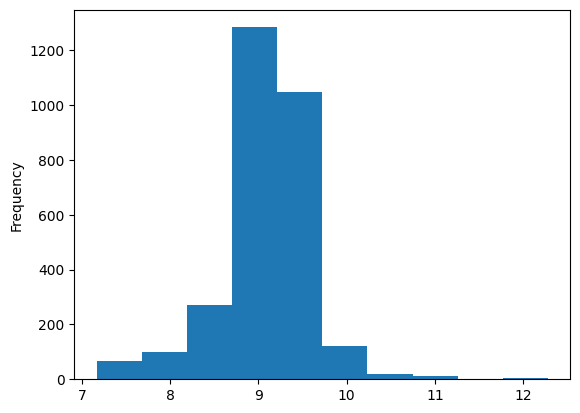

In [9]:
df_ames["log(Lot Area)"].plot.hist()

Warning: do NOT interpret symmetric as "good" and skewed as "bad". The shape of the data is what it is; there is no right or wrong. From an analysis perpesctive, the fact that Lot Area was skewed just meant that the histogram---which uses bins of equal width---did not adequately visualize the sample data. It is often more natural to view values that span multiple orders of magnitude on a logarithmic/multiplicative scale ("how many *times* bigger?") rather than a linear/absolute scale. Taking a log transformation allows us to differentially zoom in to different ranges of the data, achieving better resolution when the distribution is skewed.

You might wonder what other mathematical functions are available in `numpy` besides `log`. For one, there is `log10`, which implements the base-10 logarithm. By default, `np.log` is the natural logarithm, base-$e$, that is, $\ln$. Saying "log" to mean "natural log" is common practice in data science.

[Here is an exhaustive list of the mathematical functions](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html). All of these functions are compatible with `pandas`.

## Transformations and Skewness

It is possible for a log transformation to "overcorrect" for skew. For example, the "SalePrice" variable is also right-skewed.

<Axes: ylabel='Frequency'>

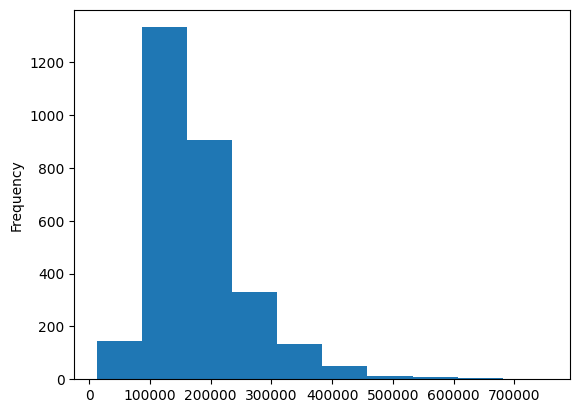

In [10]:
df_ames["SalePrice"].plot.hist()

But if we take logs, the distribution becomes somewhat left-skewed.

<Axes: ylabel='Frequency'>

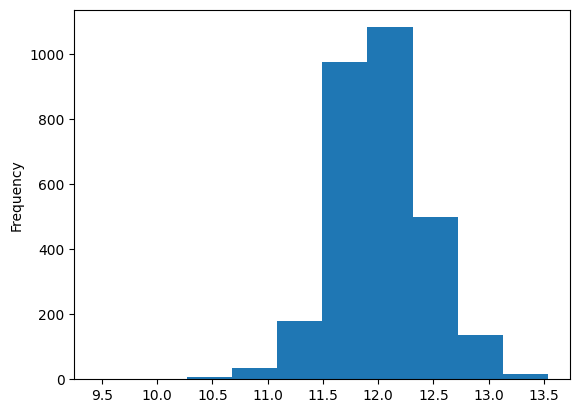

In [11]:
np.log(df_ames["SalePrice"]).plot.hist()

Is there a transformation that makes the resulting distribution more symmetric?

In fact, log is just one transformation in a whole family of transformations. Because the transformations in this family involve raising the values to some power, the statistician John Tukey called this the **ladder of powers**:

$$ x(\lambda) = \begin{cases} x^\lambda & \lambda > 0 \\  \log(x) & \lambda = 0 \\ -x^\lambda & \lambda < 0 \end{cases} $$

$\lambda = 1$ corresponds to no transformation at all. (If you're interested in why $\lambda = 0$ corresponds to $\log$ in the ladder of powers, see the "Optional" section at the bottom of this notebook.)

As we decrease $\lambda$, the distribution becomes more left-skewed (which is useful when the original distribution is right-skewed). Since log ($\lambda = 0$) was an "overcorrection" for SalePrice, let's back off and increase $\lambda$:

<Axes: ylabel='Frequency'>

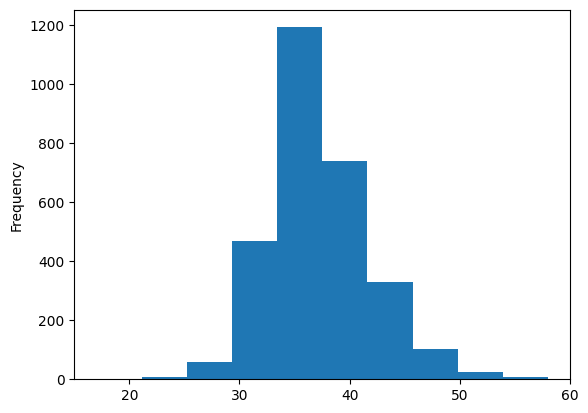

In [12]:
(df_ames["SalePrice"] ** 0.3).plot.hist()

This distribution seems a little more symmetric. We can move $\lambda$ up and down the ladder until the distribution is the shape we want.

Remember: do NOT interpret symmetric as "good" and skewed as "bad". The shape of the data is what it is; there is no right or wrong. However, symmetric distributions are the easiest to interpret, so transforming a distribution can aid interpretation; though now the interpretation refers to the transformed rather than original variable.

## Combining Variables

We can also create new variables out of multiple existing variables. For example, in the current data set, the information about when a house was sold is spread across two variables, "Yr Sold" and "Mo Sold" (1-12 indicating the month). We can combine these two variables into one, by dividing the month the house was sold by 12 and then adding that to the year. So for example, this new variable would equal 2010.5 if the house was sold in June 2010 and 2006.75 if it was sold in September 2006.

In [13]:
df_ames["Date Sold"] = df_ames["Yr Sold"] + df_ames["Mo Sold"] / 12
df_ames["Date Sold"]

0       2010.416667
1       2010.500000
2       2010.500000
3       2010.333333
4       2010.250000
           ...     
2925    2006.250000
2926    2006.500000
2927    2006.583333
2928    2006.333333
2929    2006.916667
Name: Date Sold, Length: 2930, dtype: float64

Take a look at the three columns

In [14]:
df_ames[["Yr Sold", "Mo Sold", "Date Sold"]]

,Yr Sold,Mo Sold,Date Sold
0,2010,5,2010.416667
1,2010,6,2010.500000
2,2010,6,2010.500000
3,2010,4,2010.333333
4,2010,3,2010.250000
...,...,...,...
2925,2006,3,2006.250000
2926,2006,6,2006.500000
2927,2006,7,2006.583333
2928,2006,4,2006.333333


Notice how division by 12 is _broadcast_ over the elements of the `Series` `df_ames["Mo Sold"]` to produce a new `Series`. The resulting `Series` is then added to `df_ames["Yr Sold"]`. The addition here is _elementwise_. This is an example of another feature of `pandas` and `numpy` called **vectorization**. In general, arithmetic operations between two `Series` (or two `DataFrame`s) are applied elementwise, resulting in a `Series` (or `DataFrame`) of the same shape.

This property is called _vectorization_ because it mimics the way vectors work in math. For example, to add two vectors, we add each component separately:

$$ {\bf v} + {\bf w} = \begin{pmatrix} v_1 \\ \vdots \\ v_n \end{pmatrix} + \begin{pmatrix} w_1 \\ \vdots \\ w_n \end{pmatrix} = \begin{pmatrix} v_1 + w_1 \\ \vdots \\ v_n + w_n \end{pmatrix}, $$

which is exactly how `Series` addition works. The analogy to vectors is not perfect. For example, we are allowed to divide two `Series` elementwise, which comes in handy if we want to calculate a per-unit metric (like cost per square foot):

In [15]:
df_ames["Cost per Sq Ft"] = df_ames["SalePrice"] / df_ames["Gr Liv Area"]
df_ames[["SalePrice", "Gr Liv Area", "Cost per Sq Ft"]]

,SalePrice,Gr Liv Area,Cost per Sq Ft
0,215000,1656,129.830918
1,105000,896,117.187500
2,172000,1329,129.420617
3,244000,2110,115.639810
4,189900,1629,116.574586
...,...,...,...
2925,142500,1003,142.073779
2926,131000,902,145.232816
2927,132000,970,136.082474
2928,170000,1389,122.390209


However, in math, division of two vectors is not defined: $ {\bf v}\ /\ {\bf w} =\ ? $

## Converting Between Categorical and Quantitative Variables

We have seen how quantitative variables can be converted to categorical variables using the `cut` function. What about the other way around? Can categorical variables be converted to quantitative ones? We'll use the Titanic data set as an example.

Binary categorical variables (categorical variables with exactly two categories---which are often of the form "some category of interest" and "everything else") can be converted into quantitative variables by coding one category as 1 and the other category as 0. The resulting 1/0 variable is sometimes called an "indicator" or "Bernoulli" variable. The **survived** column in the Titanic data set has already been coded this way. The easiest way to convert a categorical variable to an indicator to create a boolean mask. For example, to convert **type** (crew or passenger) to a quantitative variable **crew_indicator**, which is 1 for crew members and 0 otherwise, we can do the following:

In [16]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/titanic.csv")

def class_to_type(c):
  if c in ["1st", "2nd", "3rd"]:
    return "passenger"
  else:
    return "crew"

df_titanic["type"] = df_titanic["class"].map(class_to_type)

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,pclass,crew,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,3.0,NaN,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,3.0,NaN,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,3.0,NaN,passenger
...,...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,NaN,deck crew,crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,NaN,victualling crew,crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,NaN,engineering crew,crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN,restaurant staff,crew


In [17]:
df_titanic["crew_indicator"] = 1 * (df_titanic["type"] == "crew")
df_titanic["crew_indicator"]

0       0
1       0
2       0
3       0
4       0
       ..
2202    1
2203    1
2204    1
2205    1
2206    1
Name: crew_indicator, Length: 2207, dtype: int64

Multiplying by 1 converts the `Series` of booleans to a `Series` of integers, which Pandas will interpret as quantitative.

Now we can manipulate this new variable as we would any other quantitative variable. For example, the sum would tell us how many onboard were crew members, while the mean would tell us the _proportion_ of those on board who were crew members.

In [18]:
df_titanic["crew_indicator"].sum(), df_titanic["crew_indicator"].mean()

(890, 0.40326234707748077)

What do we do about a categorical variable with more than two categories, like `embarked`, which has four categories (B, C, Q, S)? In general, a categorical variable with $K$ categories can be converted into $K$ separate 0/1 variables, or **dummy variables**. This is called **dummy encoding** or **one-hot encoding**. Each of the $K$ dummy variables is an indicator for one of the $K$ categories. That is, a dummy variable is 1 if the observation fell into its particular category and 0 otherwise.

Although it is not difficult to create dummy variables manually, the easiest way to create them is the `get_dummies()` function in `pandas`.

In [19]:
pd.get_dummies(df_titanic["embarked"])

,B,C,Q,S
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
2202,True,False,False,False
2203,False,False,False,True
2204,False,False,False,True
2205,False,False,False,True


Since every observation is in exactly one category, each row contains exactly one 1; the rest of the values in each row are 0s. (Well, if an observation is missing the value of the categorical variable (NaN) then all of the dummy values in the row will be 0.)

We can call `get_dummies` on a `DataFrame` to encode multiple categorical variables at once. `pandas` will only dummy-encode the variables it deems as categorical, leaving the quantitative variables alone. If there are any categorical variables that are represented in the `DataFrame` using numeric types, they must be cast explicitly to a categorical type, such as `str`.  `pandas` will also automatically prepend the variable name to all dummy variables, to prevent collisions between column names in the final `DataFrame`.

In [20]:
# Pass all variables to get_dummies, dropping ones that are "other" types
df_titanic_quant = pd.get_dummies(
    df_titanic.drop(["name", "ticketno"], axis=1)
)
df_titanic_quant

,age,fare,survived,pclass,crew_indicator,gender_female,gender_male,class_1st,class_2nd,class_3rd,...,country_United States,country_Uruguay,country_Wales,country_Yugoslavia,crew_deck crew,crew_engineering crew,crew_restaurant staff,crew_victualling crew,type_crew,type_passenger
0,42.0,7.11,0,3.0,0,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,13.0,20.05,0,3.0,0,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,16.0,20.05,0,3.0,0,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True
3,39.0,20.05,1,3.0,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,16.0,7.13,1,3.0,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,41.0,NaN,1,NaN,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2203,40.0,NaN,1,NaN,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2204,32.0,NaN,0,NaN,1,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2205,20.0,NaN,0,NaN,1,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


Notice that categorical variables, like `class`, were converted to dummy variables with names like `class_1st`, `class_2nd` and `class_3rd`, while quantitative variables, like `age`, were left alone. (Remember that `pclass` was read by Pandas as quantitative, so we would need to convert that to a str if we wanted to convert it do dummies; but `class` has already done this.)

For now we have just focused on *how* to convert categorical variables to quantitative variables. Later we will see *why* we might want to.

### (Optional tangent) Why $\lambda = 0$ corresponds to $\log$

You might have noticed that it does not make sense to use the transformation $x^0$ for $\lambda = 0$, since anything raised to the zero power equals 1. But why is $\log(x)$ the right function to replace $x^0$?

The answer has to do with calculus. We want to understand the behavior of $x^\lambda$ as $\lambda$ approaches 0. To do this properly, we actually need to consider the function

$$\frac{x^\lambda - 1}{\lambda}.$$

Subtracting 1 and dividing by $\lambda$ are just constants that shift and scale the distribution; they do not affect the overall shape of the distribution. Therefore, the histogram of $x^\lambda$ will look the same as the histogram of $(x^\lambda - 1) / \lambda$; only the axes will be different.

Using calculus, you can show that the limit of the above function as $\lambda$ approaches 0 is:

$$\lim_{\lambda \to 0} \frac{x^\lambda - 1}{\lambda} = \log(x).$$

This is why it makes sense to slot $\log(x)$ in for $x^0$.